# 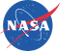 **NASA FIRMS - How to use FIRMS API in Python**

In this tutorial we will look into using FIRMS API to access up-to-date fire detections. We will cover:

- FIRMS MAP_KEY
- FIRMS API end points
- explain FIRMS datasets on how to use them

**Programming language:** Python

**Libraries:**  [pandas](https://pandas.pydata.org)

---

**LEVEL:** Beginner

---


**Remember to execute code in order**

At first, let's look what API stands for. If it confuses you, don't worry, just try to follow our code examples and see if it becomes clearer to you.

**What is an API?**

APIs are mechanisms that enable two software components to communicate with each other using a set of definitions and protocols. For example, the weather bureau’s software system contains daily weather data. The weather app on your phone “talks” to this system via APIs and shows you daily weather updates on your phone.


**What does API stand for?**

API stands for Application Programming Interface. In the context of APIs, the word Application refers to any software with a distinct function. Interface can be thought of as a contract of service between two applications. This contract defines how the two communicate with each other using requests and responses. Their API documentation contains information on how developers are to structure those requests and responses.

*https://aws.amazon.com/what-is/api/*

To view current FIRMS API calls visit https://firms.modaps.eosdis.nasa.gov/api/.

In this tutorial we will explore these FIRMS API points:
- [area](https://firms.modaps.eosdis.nasa.gov/api/area)
- [countries](https://firms.modaps.eosdis.nasa.gov/api/countries)
- [country](https://firms.modaps.eosdis.nasa.gov/api/country)
- [data_availability](https://firms.modaps.eosdis.nasa.gov/api/data_availability)

---

## Get FIRMS API Key (MAP_KEY)

---

In order to provide access to FIRMS data, we require our users to sign up for a **FREE** API / map key (we call it: MAP_KEY).

The MAP_KEY was designed to conserve FIRMS resources, so everyone could have a reasonable access to our data. For example, a download script with an error could end up requesting too much data or query our database with high frequency.

FIRMS MAP_KEY was originally designed to facilitate only mapserver visualization queries, but now can be used for other requests. For example:

- Web Map Service (WMS)
- Web Feature Service (WFS)
- API

To sign up, visit https://firms.modaps.eosdis.nasa.gov/api/map_key

FIRMS MAP_KEY limits your usage to a 10-minute window. So if you exceed your limit, after 10 minutes, it resets so you can use the system again.

---

## Test Your MAP_KEY

---

In [2]:
# Let's set your map key that was emailed to you. It should look something like 'abcdef1234567890abcdef1234567890'
MAP_KEY = '4fed9711e10d55bb3fa859c2cdce7774'
#MAP_KEY = 'abcdef1234567890abcdef1234567890'

# now let's check how many transactions we have
import pandas as pd
url = 'https://firms.modaps.eosdis.nasa.gov/mapserver/mapkey_status/?MAP_KEY=' + MAP_KEY
try:
  df = pd.read_json(url,  typ='series')
  display(df)
except:
  # possible error, wrong MAP_KEY value, check for extra quotes, missing letters
  print ("There is an issue with the query. \nTry in your browser: %s" % url)


transaction_limit             1000
current_transactions             0
transaction_interval    10 minutes
dtype: object

In [3]:
# let's create a simple function that tells us how many transactions we have used.
# We will use this in later examples

def get_transaction_count() :
  count = 0
  try:
    df = pd.read_json(url,  typ='series')
    count = df['current_transactions']
  except:
    print ("Error in our call.")
  return count

tcount = get_transaction_count()
print ('Our current transaction count is %i' % tcount)

Our current transaction count is 0


---

## API/data_availability

---

This service is designed to inform users about date range availability of our supported datasets.

For more information visit https://firms.modaps.eosdis.nasa.gov/api/data_availability

Let's see the full list of available sensors and their supported date ranges.


In [4]:
# let's query data_availability to find out what date range is available for various datasets
# we will explain these datasets a bit later

# this url will return information about all supported sensors and their corresponding datasets
# instead of 'all' you can specify individual sensor, ex:LANDSAT_NRT
da_url = 'https://firms.modaps.eosdis.nasa.gov/api/data_availability/csv/' + MAP_KEY + '/all'
df = pd.read_csv(da_url)
display(df)

data_id    min_date    max_date
0         MODIS_NRT  2024-03-01  2024-06-29
1          MODIS_SP  2000-11-01  2024-02-29
2  VIIRS_NOAA20_NRT  2019-12-04  2024-06-29
3  VIIRS_NOAA21_NRT  2024-01-17  2024-06-29
4    VIIRS_SNPP_NRT  2024-02-01  2024-06-29
5     VIIRS_SNPP_SP  2012-01-20  2024-01-31
6       LANDSAT_NRT  2022-06-20  2024-06-29
7          GOES_NRT  2022-08-09  2024-06-29
8          BA_MODIS  2000-11-01  2023-12-01

**data_id** column shows the dataset id which we will need in later queries:
- 'NRT' means this is Near Real-Time dataset but it may also includes Real Time (RT) and Ultra Real Time (URT) data [click here more info on URT/RT](https://www.earthdata.nasa.gov/faq/firms-faq#ed-urt-rt-data)
- 'SP' or Standard Processing; standard data products are an internally consistent, well-calibrated record of the Earth’s geophysical properties to support science. There is a multi-month lag in this dataset availability. [more information on SP vs NRT](https://www.earthdata.nasa.gov/faq/firms-faq#ed-nrt-standard)
- BA_MODIS is for MODIS burned areas product

**min_date** and **max_date** columns provide the available date range for these datasets. Dates are based on GMT

In [5]:
# now let's see how many transactions we use by querying this end point

start_count = get_transaction_count()
pd.read_csv(da_url)
end_count = get_transaction_count()
print ('We used %i transactions.' % (end_count-start_count))

# now remember, after 10 minutes this will reset

We used 5 transactions.


---

## API/area

---

Fire detection hotspots based on area, date and sensor. For more information visit https://firms.modaps.eosdis.nasa.gov/api/area

The end point expects these parameters: [MAP_KEY], [SOURCE], [AREA_COORDINATES],[DAY_RANGE] and optionally [DATE] for historical data

**NOTE** - querying the entire world for VIIRS can return between 30,000 - 100,000+ records per day


In [6]:
# in this example let's look at VIIRS NOAA-20, entire world and the most recent day
area_url = 'https://firms.modaps.eosdis.nasa.gov/api/area/csv/' + MAP_KEY + '/VIIRS_NOAA20_NRT/world/1'
start_count = get_transaction_count()
df_area = pd.read_csv(area_url)
end_count = get_transaction_count()
print ('We used %i transactions.' % (end_count-start_count))

df_area

We used 36 transactions.


latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0      29.80603   32.08924      328.30  0.42   0.45  2024-06-29         1   
1      30.53695   28.49578      305.26  0.42   0.38  2024-06-29         1   
2      30.53771   28.49147      306.27  0.42   0.38  2024-06-29         1   
3      30.61524   31.26323      308.52  0.55   0.42  2024-06-29         1   
4      30.70051   33.85186      324.55  0.50   0.49  2024-06-29         1   
...         ...        ...         ...   ...    ...         ...       ...   
52550  38.89211 -120.93363      338.89  0.40   0.50  2024-06-29      2129   
52551  38.89256 -120.92850      340.62  0.40   0.50  2024-06-29      2129   
52552  40.85004 -115.67332      348.31  0.40   0.60  2024-06-29      2129   
52553  40.85024 -115.66801      367.00  0.40   0.60  2024-06-29      2129   
52554  42.68565 -111.58883      342.48  0.70   0.80  2024-06-29      2130   

      satellite instrument confidence version  bright_ti5    frp daynight  
0           N20      VIIRS          n  2.0NRT      301.44   3.32        N  
1           N20      VIIRS          n  2.0NRT      294.73   0.73        N  
2           N20      VIIRS          n  2.0NRT      294.10   0.68        N  
3           N20      VIIRS          n  2.0NRT      296.85   1.68        N  
4           N20      VIIRS          n  2.0NRT      299.04   5.08        N  
...         ...        ...        ...     ...         ...    ...      ...  
52550       N20      VIIRS          n  2.1URT      307.58   5.55        D  
52551       N20      VIIRS          n  2.1URT      305.86   7.19        D  
52552       N20      VIIRS          n  2.1URT      308.07  22.87        D  
52553       N20      VIIRS          h  2.1URT      304.93  25.67        D  
52554       N20      VIIRS          n  2.1URT      302.66  13.56        D  

[52555 rows x 14 columns]

In [7]:
# We can also focus on a smaller area ex. South Asia and get the last 3 days of records
area_url = 'https://firms.modaps.eosdis.nasa.gov/api/area/csv/' + MAP_KEY + '/VIIRS_NOAA20_NRT/54,5.5,102,40/3'
df_area = pd.read_csv(area_url)
df_area

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0      5.65209  100.90922      335.27  0.41   0.37  2024-06-27       644   
1      5.82420   95.32331      333.49  0.50   0.41  2024-06-27       644   
2      5.82636   95.32464      332.40  0.50   0.41  2024-06-27       644   
3      5.83683  101.04680      331.82  0.42   0.37  2024-06-27       644   
4      6.68568  100.94560      332.62  0.42   0.38  2024-06-27       644   
...        ...        ...         ...   ...    ...         ...       ...   
1106  39.78978   98.30138      305.40  0.35   0.57  2024-06-29      1836   
1107  39.79079   97.88979      302.76  0.37   0.58  2024-06-29      1836   
1108  14.64714  101.04243      302.64  0.41   0.37  2024-06-29      1841   
1109  14.64770  101.03864      304.91  0.41   0.37  2024-06-29      1841   
1110  23.66645  101.40648      298.17  0.48   0.40  2024-06-29      1841   

     satellite instrument confidence version  bright_ti5   frp daynight  
0          N20      VIIRS          n  2.0NRT      294.33  4.23        D  
1          N20      VIIRS          n  2.0NRT      295.61  7.19        D  
2          N20      VIIRS          n  2.0NRT      295.05  5.46        D  
3          N20      VIIRS          n  2.0NRT      298.48  5.72        D  
4          N20      VIIRS          n  2.0NRT      297.33  3.30        D  
...        ...        ...        ...     ...         ...   ...      ...  
1106       N20      VIIRS          n  2.0NRT      286.80  1.22        N  
1107       N20      VIIRS          n  2.0NRT      285.34  1.52        N  
1108       N20      VIIRS          n  2.0NRT      282.20  0.67        N  
1109       N20      VIIRS          n  2.0NRT      282.62  1.15        N  
1110       N20      VIIRS          n  2.0NRT      278.35  0.69        N  

[1111 rows x 14 columns]

---

## API/countries

---

List of supported countries and their 3-letter codes. This may be easier to read in html format https://firms.modaps.eosdis.nasa.gov/api/countries/?format=html however, you won't be able to see the exent box defined for each country.

Example below shows how you can view from Python.

In [8]:
# We can also focus on smaller area ex. South Asia and get last 3 days of records
countries_url = 'https://firms.modaps.eosdis.nasa.gov/api/countries'
df_countries = pd.read_csv(countries_url, sep=';')
df_countries

id abreviation           name  \
0      1         ABW          Aruba   
1      2         AFG    Afghanistan   
2      3         AGO         Angola   
3      4         AIA       Anguilla   
4      6         ALA  Aland Islands   
..   ...         ...            ...   
239  234         WSM          Samoa   
240  235         YEM          Yemen   
241  236         ZAF   South Africa   
242  237         ZMB         Zambia   
243  238         ZWE       Zimbabwe   

                                                extent  
0    BOX(-70.0624080069999 12.417669989,-69.8768204...  
1    BOX(60.4867777910001 29.3866053260001,74.89230...  
2    BOX(11.6693941430001 -18.0314047239998,24.0617...  
3    BOX(-63.4288223949999 18.1690941430001,-62.972...  
4    BOX(19.5131942070001 59.9044863950001,21.09669...  
..                                                 ...  
239  BOX(-172.782582161 -14.052829685,-171.43769283...  
240  BOX(42.5457462900001 12.1114436720001,54.54029...  
241  BOX(16.4699813160001 -46.965752863,37.97779381...  
242  BOX(21.9798775630001 -18.0692318719999,33.6742...  
243  BOX(25.219369751 -22.3973397829999,33.04276818...  

[244 rows x 4 columns]

---

## API/country

---

Provides data specific to a country, although not recommended for large countries such as USA, China, Canada, Russia due to the complexity and size of their polygon shape which may cause the query to time out. To figure out the country code, see [/api/countries](https://firms.modaps.eosdis.nasa.gov/api/countries/?format=html) (example above).

In [9]:
# Let's see last four days MODIS data for Peru
peru_url = 'https://firms.modaps.eosdis.nasa.gov/api/country/csv/' + MAP_KEY + '/MODIS_NRT/PER/4'
df_peru = pd.read_csv(peru_url)
df_peru

country_id  latitude  longitude  brightness  scan  track    acq_date  \
0         PER  -3.55758  -80.47473      318.68  1.34   1.15  2024-06-26   
1         PER  -8.36479  -74.55623      305.43  4.61   1.97  2024-06-26   
2         PER  -6.61368  -79.77071      314.37  1.67   1.27  2024-06-26   
3         PER  -5.25311  -80.63268      315.32  1.38   1.16  2024-06-26   
4         PER  -4.86348  -80.85852      324.73  1.32   1.14  2024-06-26   
..        ...       ...        ...         ...   ...    ...         ...   
73        PER  -3.56922  -80.37366      324.59  1.09   1.04  2024-06-28   
74        PER  -3.54984  -80.43575      321.84  1.10   1.05  2024-06-28   
75        PER  -3.54845  -80.42605      320.64  1.10   1.04  2024-06-28   
76        PER  -3.53919  -80.42741      340.18  1.10   1.04  2024-06-28   
77        PER -15.78513  -71.85426      318.03  1.50   1.21  2024-06-29   

    acq_time satellite instrument  confidence version  bright_t31    frp  \
0       1518     Terra      MODIS          45  6.1NRT      297.26  11.31   
1       1520     Terra      MODIS           0  6.1NRT      288.75  42.47   
2       1520     Terra      MODIS          71  6.1NRT      294.16  14.04   
3       1520     Terra      MODIS          64  6.1NRT      295.76   9.26   
4       1520     Terra      MODIS          48  6.1NRT      297.38  18.68   
..       ...       ...        ...         ...     ...         ...    ...   
73      1928      Aqua      MODIS          78  6.1NRT      300.46  11.85   
74      1928      Aqua      MODIS          73  6.1NRT      298.89   9.61   
75      1928      Aqua      MODIS          66  6.1NRT      298.98   8.32   
76      1928      Aqua      MODIS          90  6.1NRT      300.69  37.31   
77      1408     Terra      MODIS          76  6.1NRT      294.12  22.10   

   daynight  
0         D  
1         D  
2         D  
3         D  
4         D  
..      ...  
73        D  
74        D  
75        D  
76        D  
77        D  

[78 rows x 15 columns]

---

## FIRMS Datasets

---

As you may have seen when looking at data_availability there are following available datasets:

- LANDSAT_NRT **US/Canada only** [data attributes](https://www.earthdata.nasa.gov/faq/firms-faq#ed-landsat-fires-attributes)
- MODIS_NRT [data attributes](https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/mcd14dl-nrt#ed-firms-attributes)
- MODIS_SP [data attributes](https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/mcd14dl-nrt#ed-firms-attributes)
- VIIRS_NOAA20_NRT [data attributes](https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/vnp14imgtdlnrt#ed-viirs-375m-attributes)
- VIIRS_SNPP_NRT [data attributes](https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/vnp14imgtdlnrt#ed-viirs-375m-attributes)
- VIIRS_SNPP_SP [data attributes](https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/vnp14imgtdlnrt#ed-viirs-375m-attributes)

**NRT**: dataset consists of (Near Real-Time, Real-Time and Ultra Real-Time) data. [view details on RT and URT](https://www.earthdata.nasa.gov/faq/firms-faq#ed-urt-rt-data). Also explore our blog: [Wildfire detection in the US and Canada within a minute of satellite observation](https://wiki.earthdata.nasa.gov/display/FIRMS/2022/07/14/Wildfire+detection+in+the+US+and+Canada+within+a+minute+of+satellite+observation)

**SP**: Standard Processing; standard data products are an internally consistent, well-calibrated record of the Earth’s geophysical properties to support science. There is a multi-month lag in this dataset availability. [more information on SP vs NRT](https://www.earthdata.nasa.gov/faq/firms-faq#ed-nrt-standard)

---

## Summary

---

Thank you for taking time to go over the tutorial. We hope you enjoyed it and if you have any questions or comments please use the 'Feedback' form at the top of our site [firms.modaps.eosdis.nasa.gov](https://firms.modaps.eosdis.nasa.gov)